In [7]:
# Using ARIMA model to forecast stock market returns and/or the stock price (if available)
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools as tsa
import yfinance as yf

In [3]:
# Import Data
# Importing stock data using yfinance

stockPrices = yf.download("C", start="2010-01-01")
stockPrices = stockPrices.dropna()
stockPrices = stockPrices.reset_index()
stockPrices = stockPrices.rename(columns={"Date": "date", "Open": "open", "High": "high", "Low": "low", "Close": "close", "Adj Close": "adjClose", "Volume": "volume"})

print(stockPrices.head())

[*********************100%%**********************]  1 of 1 completed

        date       open       high        low      close   adjClose    volume
0 2010-01-04  33.599998  34.099998  33.400002  34.000000  26.639051  40679350
1 2010-01-05  34.200001  35.500000  34.099998  35.299999  27.657597  66861710
2 2010-01-06  35.599998  36.799999  35.099998  36.400002  28.519457  67433890
3 2010-01-07  36.900002  37.000000  36.099998  36.500000  28.597788  67245190
4 2010-01-08  36.500000  36.700001  35.099998  35.900002  28.127703  62409770


ADF Result
(-2.2361670168130834, 0.1933816718886071, 29, 3576, {'1%': -3.4321799777078366, '5%': -2.8623485814137557, '10%': -2.567200421005185}, 9056.691020069069)
KPSS Result
(5.479080483346767, 0.01, 38, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\isss1\AppData\Local\Temp\ipykernel_27080\3952377402.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpssResult = tsa.kpss(stockPrices['adjClose'])


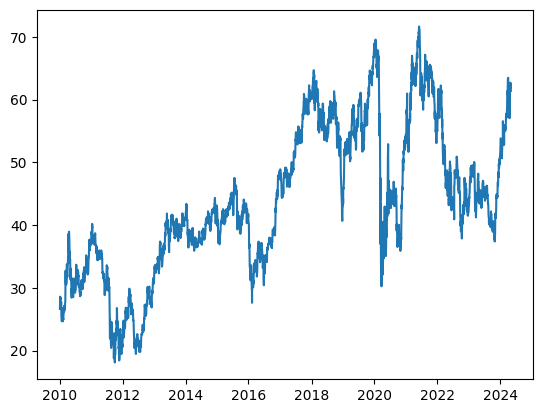

In [22]:
# Plot adjClose data
plt.plot(stockPrices['date'], stockPrices['adjClose'])

# Conduct ADF test to test if this this time-series process is stationary
adfResult = tsa.adfuller(stockPrices['adjClose'])
kpssResult = tsa.kpss(stockPrices['adjClose'])

print(f"ADF Result\n{adfResult}")
print(f"KPSS Result\n{kpssResult}")

# Results are consistent -- both conclude that this is a non-stationary process (need to first-difference).

         date       open       high        low      close   adjClose   
6  2010-01-12  35.900002  36.099998  34.799999  35.200001  27.579256  \
7  2010-01-13  35.400002  35.900002  35.000000  35.000000  27.422546   
8  2010-01-14  35.599998  35.599998  35.000000  35.099998  27.500910   
9  2010-01-15  34.900002  35.000000  34.000000  34.200001  26.795750   
10 2010-01-19  33.400002  35.599998  33.000000  35.400002  27.735943   

      volume  logAdjClose  logDifAdjClose  
6   47011810     3.317064       -0.030771  
7   41035110     3.311366       -0.005698  
8   27417030     3.314219        0.002854  
9   54017740     3.288243       -0.025976  
10  80789300     3.322729        0.034486  
ADF Result
(-11.403064237637963, 7.564898728368738e-21, 28, 3571, {'1%': -3.432182541829493, '5%': -2.8623497140302914, '10%': -2.5672010239749072}, -17311.848789822507)
KPSS Result
(0.02467242886145662, 0.1, 16, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\isss1\AppData\Local\Temp\ipykernel_27080\4203042566.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpssFirstDifResult = tsa.kpss(stockPrices['logDifAdjClose'])


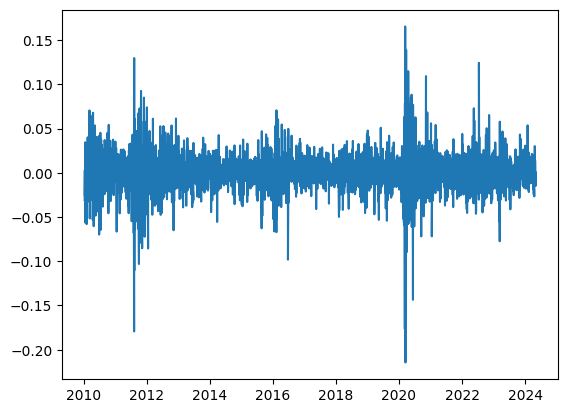

In [30]:
# Constructing a new variable to achieve a stationary process.
# Getting log difference approximation of percentage changes (a way of first differencing the data)
stockPrices['logAdjClose'] = np.log(stockPrices['adjClose'])
stockPrices['logDifAdjClose'] = stockPrices['logAdjClose'].diff()

# Dropping first row as it does not have a percentage change
stockPrices = stockPrices.dropna()

# View constructed data
print(stockPrices.head())
plt.plot(stockPrices['date'], stockPrices['logDifAdjClose'])

# Test to see if percentage returns process is stationary
adfFirstDifResult = tsa.adfuller(stockPrices['logDifAdjClose'])
kpssFirstDifResult = tsa.kpss(stockPrices['logDifAdjClose'])

print(f"ADF Result\n{adfFirstDifResult}")
print(f"KPSS Result\n{kpssFirstDifResult}")

# Results are consistent -- this first differenced data is stationary. We can perform statistical inference tests on this.